[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/danimateos/hotdog-nohotdog/06-On_the_shoulders_of_giants.ipynb)

# On the shoulders of giants

Hi there!

Last time, we managed to get our [hotdog detector] to around 0.20 loss, which translated into 92% accuracy. But Jian-Yang is not yet happy- we won't rest until we reach at least 95%!
[VGG16]

[hotdog detector]: https://www.youtube.com/watch?v=ACmydtFDTGs
[VGG16]: https://arxiv.org/abs/1409.1556

In [1]:
import keras
from keras import backend as K
from keras.applications import VGG16

vgg = VGG16(weights='imagenet', 
            include_top=False, 
            input_shape=(120,120,3))

Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Flatten

model = keras.Sequential()
vgg.trainable = False
model.add(vgg)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 15,329,473
Trainable params: 614,785
Non-trainable params: 14,714,688
__________________________________________________________

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = 'data/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1 / 255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(120,120),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(120,120),
                                                        batch_size=100,
                                                        class_mode='binary')

validation_generator_noshuffle = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(120,120),
                                                        batch_size=100,
                                                        shuffle=False,                                                            
                                                        class_mode='binary')

Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [4]:
from keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history = model.fit_generator(train_generator,
                              class_weight = {0: 7, 1: 1},
                              steps_per_epoch=30,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/30
30/30 [==============================] - 53s 2s/step - loss: 0.8476 - acc: 0.7654 - val_loss: 0.2108 - val_acc: 0.9140
Epoch 2/30
30/30 [==============================] - 18s 587ms/step - loss: 0.6785 - acc: 0.8165 - val_loss: 0.2501 - val_acc: 0.8998
Epoch 3/30
30/30 [==============================] - 19s 646ms/step - loss: 0.6293 - acc: 0.8387 - val_loss: 0.1894 - val_acc: 0.9241
Epoch 4/30
30/30 [==============================] - 21s 704ms/step - loss: 0.6640 - acc: 0.8307 - val_loss: 0.3452 - val_acc: 0.8623
Epoch 5/30
30/30 [==============================] - 19s 649ms/step - loss: 0.5625 - acc: 0.8599 - val_loss: 0.2232 - val_acc: 0.9130
Epoch 6/30
30/30 [==============================] - 19s 644ms/step - loss: 0.5830 - acc: 0.8467 - val_loss: 0.2034 - val_acc: 0.9322
Epoch 7/30
30/30 [==============================] - 19s 644ms/step - loss: 0.5307 - acc: 0.8713 - val_loss: 0.3731 - val_acc: 0.8330
Epoch 8/30
30/30 [==============================] - 19s 623ms/step - los

In [5]:
from mateosio import plot_confusion_matrix

ax, precision, recall = plot_confusion_matrix(model, validation_generator_noshuffle)
print(precision, recall)

0.705479452055 0.90350877193


In [6]:
model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-4),
                     metrics=['acc'])

history_pt2 = model.fit_generator(train_generator,
                                  class_weight = {0: 7, 1: 1},
                                  steps_per_epoch=30,
                                  epochs=30,
                                  validation_data=validation_generator,
                                  validation_steps=10)

model.save('vgg_frozen_convbase.h5')

Epoch 1/30
30/30 [==============================] - 22s 733ms/step - loss: 0.4229 - acc: 0.8935 - val_loss: 0.1894 - val_acc: 0.9342
Epoch 2/30
30/30 [==============================] - 18s 613ms/step - loss: 0.4064 - acc: 0.9019 - val_loss: 0.1759 - val_acc: 0.9403
Epoch 3/30
30/30 [==============================] - 19s 617ms/step - loss: 0.3975 - acc: 0.8977 - val_loss: 0.2038 - val_acc: 0.9180
Epoch 4/30
30/30 [==============================] - 19s 649ms/step - loss: 0.3750 - acc: 0.8997 - val_loss: 0.1796 - val_acc: 0.9342
Epoch 5/30
30/30 [==============================] - 19s 618ms/step - loss: 0.3784 - acc: 0.8894 - val_loss: 0.1708 - val_acc: 0.9413
Epoch 6/30
30/30 [==============================] - 18s 611ms/step - loss: 0.4119 - acc: 0.8881 - val_loss: 0.1931 - val_acc: 0.9281
Epoch 7/30
30/30 [==============================] - 19s 633ms/step - loss: 0.3592 - acc: 0.9120 - val_loss: 0.1747 - val_acc: 0.9372
Epoch 8/30
30/30 [==============================] - 18s 605ms/step - 

0.641509433962 0.894736842105


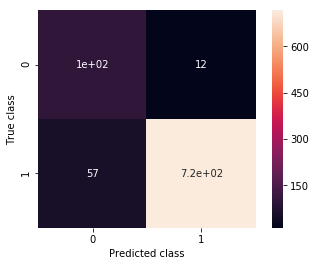

In [7]:
ax, precision, recall = plot_confusion_matrix(model, validation_generator_noshuffle)
print(precision, recall)

And with that, we've improved our accuracy a further XX%!

Notice that our model, now, has less free parameters than the original one: now we are only training the fully connected layers at the top. This improvement is wholly due to the convolutional filters in VGG16 having learned more useful features than our convolutional layers, even though they where trained for a (somewhat) different task!! Isn't that cool?

In practice, my guess is that it's both due to higher complexity in the convolutional base and many more training samples. Not to mention the experience and knowledge of the scientists that designed VGG! That's what I meant by "standing on the shoulders of giants". These guys spent years of their life, thousands of hours of work, and a lot of money and GPU time to train this network. Now we get it for free with little more than an import. Sometimes progress is awesome.









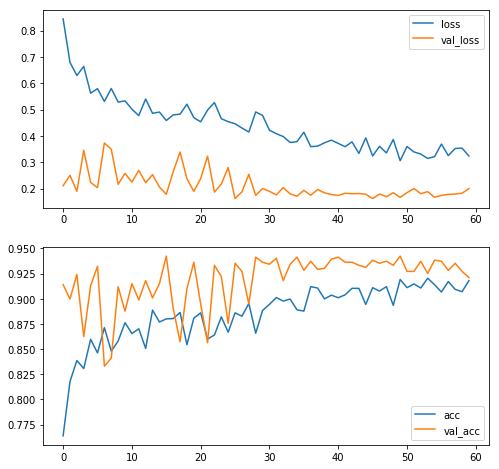

In [8]:
from mateosio import plot_training_histories
%matplotlib inline

plot_training_histories(history, history_pt2);

### Fine Tuning

In [9]:
# The VGG16 inside my model:

model.layers[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 120, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 120, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 120, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 60, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 60, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 60, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 30, 128)       0         
__________

In [10]:
for layer in model.layers[0].layers:
    if 'block5' in layer.name: 
        layer.trainable = True
    else: 
        layer.trainable = False
        
# Set the vgg as a whole to trainable:        
model.layers[0].trainable = True   

In [11]:
[layer.trainable for layer in model.layers[0].layers]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True]

Now we keep training the model. This time we will be updating the top few layers. We want to reduce the learning rate in order to keep them from 'flailing around'

At first the loss and accuracy get worse, but they will start improving soon enough.

In [12]:
model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-5),
                     metrics=['acc'])

history_pt2 = model.fit_generator(train_generator,
                                  class_weight = {0: 7, 1: 1},
                                  steps_per_epoch=30,
                                  epochs=30,
                                  validation_data=validation_generator,
                                  validation_steps=10)

model.save('vgg_unfrozen_convbase_30epochs.h5')

Epoch 1/30
30/30 [==============================] - 21s 710ms/step - loss: 0.3675 - acc: 0.9024 - val_loss: 0.1838 - val_acc: 0.9302
Epoch 2/30
30/30 [==============================] - 18s 608ms/step - loss: 0.3445 - acc: 0.9164 - val_loss: 0.1656 - val_acc: 0.9332
Epoch 3/30
30/30 [==============================] - 18s 608ms/step - loss: 0.3253 - acc: 0.9173 - val_loss: 0.1545 - val_acc: 0.9453
Epoch 4/30
30/30 [==============================] - 20s 655ms/step - loss: 0.2971 - acc: 0.9223 - val_loss: 0.2101 - val_acc: 0.9261
Epoch 5/30
30/30 [==============================] - 18s 590ms/step - loss: 0.3161 - acc: 0.9188 - val_loss: 0.1488 - val_acc: 0.9484
Epoch 6/30
30/30 [==============================] - 18s 608ms/step - loss: 0.2957 - acc: 0.9299 - val_loss: 0.2041 - val_acc: 0.9150
Epoch 7/30
30/30 [==============================] - 18s 606ms/step - loss: 0.2821 - acc: 0.9229 - val_loss: 0.1587 - val_acc: 0.9474
Epoch 8/30
30/30 [==============================] - 18s 607ms/step - 

0.795454545455 0.921052631579


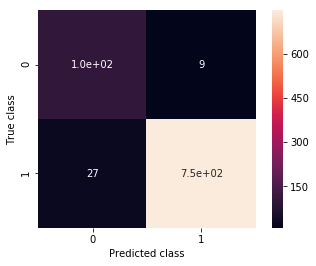

In [13]:
ax, precision, recall = plot_confusion_matrix(model, validation_generator_noshuffle)
print(precision, recall)

In [14]:
model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-5),
                     metrics=['acc'])

history_pt3 = model.fit_generator(train_generator,
                                  class_weight = {0: 7, 1: 1},
                                  steps_per_epoch=30,
                                  epochs=30,
                                  validation_data=validation_generator,
                                  validation_steps=10)

model.save('vgg_unfrozen_convbase_60epochs.h5')

Epoch 1/30
30/30 [==============================] - 22s 717ms/step - loss: 0.1564 - acc: 0.9605 - val_loss: 0.1630 - val_acc: 0.9565
Epoch 2/30
30/30 [==============================] - 18s 604ms/step - loss: 0.1564 - acc: 0.9615 - val_loss: 0.1764 - val_acc: 0.9453
Epoch 3/30
30/30 [==============================] - 18s 606ms/step - loss: 0.1686 - acc: 0.9557 - val_loss: 0.1775 - val_acc: 0.9362
Epoch 4/30
30/30 [==============================] - 20s 658ms/step - loss: 0.1464 - acc: 0.9617 - val_loss: 0.1506 - val_acc: 0.9585
Epoch 5/30
30/30 [==============================] - 18s 600ms/step - loss: 0.1326 - acc: 0.9655 - val_loss: 0.1458 - val_acc: 0.9585
Epoch 6/30
30/30 [==============================] - 18s 601ms/step - loss: 0.1403 - acc: 0.9673 - val_loss: 0.1287 - val_acc: 0.9555
Epoch 7/30
30/30 [==============================] - 18s 604ms/step - loss: 0.1306 - acc: 0.9686 - val_loss: 0.1211 - val_acc: 0.9666
Epoch 8/30
30/30 [==============================] - 18s 602ms/step - 

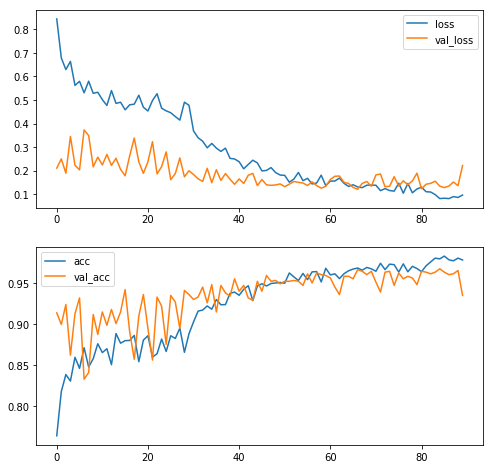

In [15]:
plot_training_histories(history, history_pt2, history_pt3);

0.68125 0.956140350877


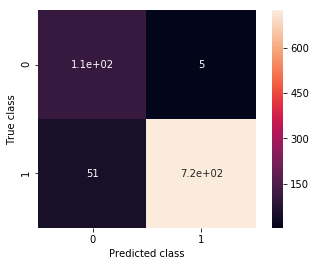

In [16]:
ax, precision, recall = plot_confusion_matrix(model, validation_generator_noshuffle)
print(precision, recall)

Well, we did manage to get us some of that sweet sweet overfitting, didn't we? Notice how the training loss had gotten kind of stuck there until we lowered the learning rate. 

In this case, unfreezing the top of the convolutional stack didn't help us a lot, possibly because VGG16 was trained on ImageNet so the features it recognizes are already very applicable.

In any case, I feel that there is still some performance here that we can squeeze out. What do you say, we apply some more regularization??